# STUDENT SCORES SUPERVISED MACHINE LEARNING PROBLEM

## INTRODUCTION

In this project we will predict the percentage of marks a student is expected to score based on the number of hours studied.

## DATA UNDERSTANDING

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data into a dataframe
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Data inspection
# Check dataframe columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We have observed that the data has two columns. The feature variable is **Hours** and the target variable is **Scores**. The data has **25 rows** abd consists of Hours with a **float datatype** and Score with an **integer datatype**.

## DATA CLEANING

In [4]:
# Check for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

No missing values

In [5]:
# Check that all data is numeric
df.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())

Hours     True
Scores    True
dtype: bool

Data is numeric

In [6]:
# Check for outliers using iqr method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Hours     0
Scores    0
dtype: int64

No outliers detected

## EXPLORATORY DATA ANALYSIS

In [7]:
# Descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- We can see that most students study an average of 5.0 hours/day and score an average of 51.48%.
- We can also see that the standard deviation of hours studied is 2.5 hours/day and the standard deviation of score is  25.3%
- We can also observed that the minimum and maxiumum hours/day studied are 1.1 and 9.2 respectively.
- We can also observed that the minimum and maxiumum scores are 17 and 95 respectively.

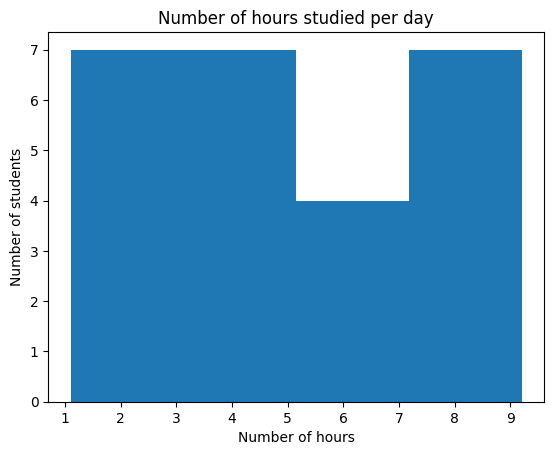

In [8]:
# Plot a histogram for number of hours studied per day
plt.hist(df['Hours'], bins =4)
plt.title('Number of hours studied per day')
plt.xlabel('Number of hours')
plt.ylabel('Number of students');

The histogram above shows a slightly right-skewed distribution, as the tail of the distribution extends more to the right than to the left. This means that there are more students who study fewer hours per day and fewer students who study more hours per day. The majority of students study between 3 to 7 hours per day, with a peak at around 5 hours per day. This indicates that most students have a similar study pattern, with only a few students studying significantly more or less than the average.

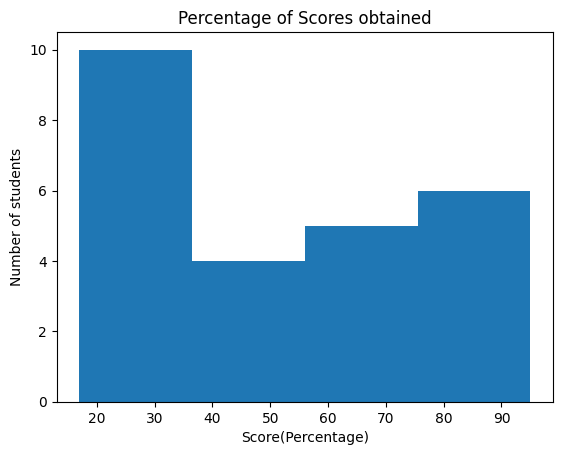

In [9]:
# Plot a histogram for scores of students
plt.hist(df['Scores'], bins=4)
plt.title('Percentage of Scores obtained')
plt.xlabel('Score(Percentage)')
plt.ylabel('Number of students');

We can observe that most students scored between 30-40% and the histogram is slightly skewed to the right.

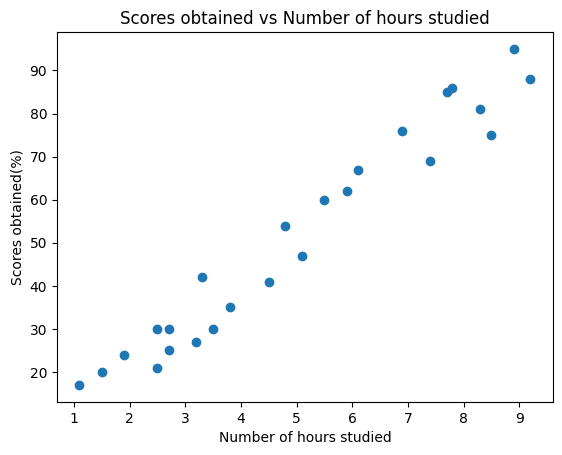

In [10]:
# plot a scatter plot of scores obtained against number of hours studied
plt.scatter(df['Hours'], df['Scores'])
plt.title('Scores obtained vs Number of hours studied')
plt.xlabel('Number of hours studied')
plt.ylabel('Scores obtained(%)');

In [11]:
# Check correlation
df['Hours'].corr(df['Scores'])

0.9761906560220887

We can observe a strong positive correlation between number of hours studied and the percentage score obtained. Therefore hours studied is a strong predictor of score.

In [12]:
# Check if the relationship between both variables is linear or nonlinear
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Hours'], df['Scores'])
if abs(r_value) == 1:
    print("The relationship between both variables is perfectly linear.")
elif abs(r_value) >= 0.7:
    print("The relationship between both variables is strongly linear.")
elif abs(r_value) >= 0.3:
    print("The relationship between both variables is moderately linear.")
else:
    print("The relationship between both variables is weakly linear or nonlinear.")

The relationship between both variables is strongly linear.


Having established that the relationship between the variables is strongly linear we can utilize a **Linear Regression Model** to predict the scores of students from the number of hours studied. 

## DATA PREPARATION

In [13]:
# Divide the data into features and target variables.
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values  

In [14]:
pd.DataFrame(X).head()

,0
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [15]:
# Reshape the data since we are making prediction from one variable
print(type(X))
print(X.shape)
X = X.reshape(-1,1)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(25, 1)
<class 'numpy.ndarray'>
(25, 1)


In [16]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023) 

In [17]:
# Visual data inspection
data = [X_train, y_train, X_test, y_test]
for x in data:
    print(pd.DataFrame(x).head(), "\n")

     0
0  5.9
1  6.1
2  7.8
3  3.8
4  4.8 

    0
0  62
1  67
2  86
3  35
4  54 

     0
0  2.7
1  4.5
2  3.5
3  7.7
4  1.1 

    0
0  25
1  41
2  30
3  85
4  17 



## MODEL TRAINING

In [18]:
# Train the Linear Regression Model
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

In [19]:
# Extract the regression coefficients
coefficients = reg.coef_
intercept = reg.intercept_

# Write the regression equation
print(f"Regression Equation: y = {intercept:.5f} + {coefficients[0]:.5f}x")

Regression Equation: y = 3.96170 + 9.54410x


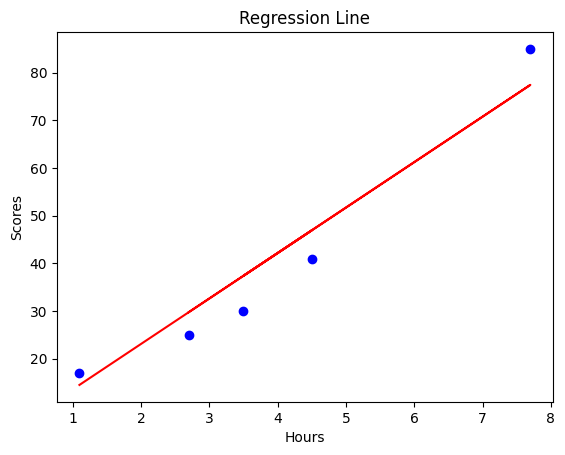

In [20]:
# Plot the regression line on the test data

# Plot the test data
plt.scatter(X_test, y_test, color='blue')

# Plot the regression line
plt.plot(X_test, reg.predict(X_test), color='red')

# Add labels and title
plt.title('Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## MODEL PREDICTIONS

In [21]:
# Predict test data
y_pred = reg.predict(X_test)

In [22]:
# Make a custom prediction
# What is the predicted score if a student studies for 9.25 hours/day
hrs = [[9.25]]
custom_pred = reg.predict(hrs)
print(f"Number of hours studied, {hrs[0][0]} hours results in a score prediction of {custom_pred[0]:.0f}%")

Number of hours studied, 9.25 hours results in a score prediction of 92%


## MODEL EVALUATION

In [23]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

mse

35.00051391681818

In [24]:
# Cross validation score
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results,)
print(np.mean(cv_results), np.std(cv_results))

[0.96780555 0.74949743 0.90881545 0.94043752 0.95414507]
0.9041402050111291 0.07975901787429952


Based on the mean squared error of 35 and the mean cross validation score of 0.90, it can be inferred that the model has performed well on the test data and can generalize well to unseen data. The mean squared error of 35 indicates that the model's predictions are on average 5.92 points away from the actual scores. The mean cross validation score of 0.90 indicates that the model has an average accuracy of 90% on unseen data. 

Therefore, it can be concluded that the model is a good fit for the given data and can be used for making predictions on new data.

## MODEL ALTERNATIVES EVALUATION

It is possible that using Lasso or Ridge regression or ensemble methods could increase the performance of the model above. Lasso and Ridge regression are regularization techniques that can help prevent overfitting and improve the model's ability to generalize to new data. 

Ensemble methods, such as Random Forest or Gradient Boosting, can combine multiple models to improve the overall performance.  Therefore, it is recommended to try out different methods and compare their performance to determine the best approach for the given data.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_pred = lasso_grid.predict(X_test)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regression Best Parameters:", lasso_grid.best_params_)
print("Lasso Regression Mean Squared Error:", lasso_mse)
print("Lasso Regression Mean Cross Validation Score:", lasso_scores.mean())
print("\n")

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
ridge_pred = ridge_grid.predict(X_test)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Regression Best Parameters:", ridge_grid.best_params_)
print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Ridge Regression Mean Cross Validation Score:", ridge_scores.mean())
print("\n")

# Random Forest Regression
rf = RandomForestRegressor()
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest Regression Best Parameters:", rf_grid.best_params_)
print("Random Forest Regression Mean Squared Error:", rf_mse)
print("Random Forest Regression Mean Cross Validation Score:", rf_scores.mean())
print("\n")

# Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
gb_grid = GridSearchCV(gb, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
gb_pred = gb_grid.predict(X_test)
gb_scores = cross_val_score(gb, X_train, y_train, cv=5)
gb_mse = mean_squared_error(y_test, gb_pred)
print("Gradient Boosting Regression Best Parameters:", gb_grid.best_params_)
print("Gradient Boosting Regression Mean Squared Error:", gb_mse)
print("Gradient Boosting Regression Mean Cross Validation Score:", gb_scores.mean())

Lasso Regression Best Parameters: {'alpha': 0.001}
Lasso Regression Mean Squared Error: 18.944138913812793
Lasso Regression Mean Cross Validation Score: 0.7908427389559995


Ridge Regression Best Parameters: {'alpha': 0.001}
Ridge Regression Mean Squared Error: 18.943660540180556
Ridge Regression Mean Cross Validation Score: 0.792934274368088


Random Forest Regression Best Parameters: {'max_depth': 7, 'n_estimators': 50}
Random Forest Regression Mean Squared Error: 10.736321111111117
Random Forest Regression Mean Cross Validation Score: 0.5452143685929464


Gradient Boosting Regression Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Regression Mean Squared Error: 30.662110310161125
Gradient Boosting Regression Mean Cross Validation Score: 0.4335534092547347


We can conclude that the **Linear Regression Model is still the best performing model overall** due to its high cross validation score and while other models have been shown to improve the mean squared error they do so at huge expense to the cross validation score.